In [1]:
"""
Created on July 2024
@author: Théotime de la Selle
"""

# import os, sys, time, random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

import nltk as nl
# from nltk.tokenize import word_tokenize,wordpunct_tokenize
# from nltk.stem import WordNetLemmatizer,PorterStemmer
# from nltk.corpus import words
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# from scipy.signal import correlate

# Load and verify data

In [2]:
Evangiles = pickle.load(open("data/Evangiles.pkl", "rb"))
Mark = pickle.load(open("data/Mark.pkl", "rb"))
Matt = pickle.load(open("data/Matt.pkl", "rb"))
Luke = pickle.load(open("data/Luke.pkl", "rb"))
John = pickle.load(open("data/John.pkl", "rb"))

# Ev_verses = Evangiles.shape[0]
display(Evangiles.sample(5))

DM_Ev = pickle.load(open("distance_matrices/dist_mat_Ev.pkl", "rb"))
DM_Mc = pickle.load(open("distance_matrices/dist_mat_Mc.pkl", "rb"))
DM_Mt = pickle.load(open("distance_matrices/dist_mat_Mt.pkl", "rb"))
DM_Lc = pickle.load(open("distance_matrices/dist_mat_Lc.pkl", "rb"))
DM_Jn = pickle.load(open("distance_matrices/dist_mat_Jn.pkl", "rb"))

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
3401,John 11:34,καὶ εἶπεν ποῦ τεθείκατε αὐτόν λέγουσιν αὐτῶι κ...,"[καὶ, εἶπεν, ποῦ, τεθείκατε, αὐτόν, λέγουσιν, ...","[καί, λέγω, ποῦ, τίθημι, αὐτός, λέγω, αὐτῶι, κ...","[εἶπεν, ποῦ, τεθείκατε, αὐτόν, λέγουσιν, αὐτῶι...","[εἶπον, ποῦ, τίθημι, αὐτός, λέγω, κύριος, ἔρχο...","[(εἶπον, ποῦ), (ποῦ, τίθημι), (τίθημι, αὐτός),...","[(εἶπον, ποῦ, τίθημι), (ποῦ, τίθημι, αὐτός), (...","[0.1546306749933854, 0.22553404787505776, 0.34...","[coordinating_conjunction, verb, adverb, verb,...","[[], [(habitual, imperfective, iterative, perf...","[αὐτός, εἶδον, εἶπον, κύριος, λέγω, ποῦ, τίθημ..."
1409,Mark 9:20,καὶ ἤνεγκαν αὐτὸν πρὸς αὐτόν καὶ ἰδὼν αὐτὸν τὸ...,"[καὶ, ἤνεγκαν, αὐτὸν, πρὸς, αὐτόν, καὶ, ἰδὼν, ...","[καί, φέρω, αὐτός, πρός, αὐτός, καί, ὁράω, αὐτ...","[ἤνεγκαν, αὐτὸν, αὐτόν, ἰδὼν, αὐτὸν, πνεῦμα, ε...","[φέρω, αὐτός, αὐτός, εἶδον, αὐτός, πνεῦμα, συσ...","[(φέρω, αὐτός), (αὐτός, αὐτός), (αὐτός, εἶδον)...","[(φέρω, αὐτός, αὐτός), (αὐτός, αὐτός, εἶδον), ...","[0.3459443084946786, 0.24919347951985132, 0.19...","[coordinating_conjunction, verb, pronoun, adpo...","[[], [(habitual, imperfective, iterative, perf...","[αὐτός, γῆ, εἶδον, κυλίω, πίπτω, πνεῦμα, συσπα..."
268,Matt 9:34,οἱ δὲ φαρισαῖοι ἔλεγον ἐν τῶι ἄρχοντι τῶν δαιμ...,"[οἱ, δὲ, φαρισαῖοι, ἔλεγον, ἐν, τῶι, ἄρχοντι, ...","[ὁ, δέ, φαρισαῖος, λέγω, ἐν, τῶι, ἄρχω, ὁ, δαι...","[φαρισαῖοι, ἔλεγον, τῶι, ἄρχοντι, δαιμονίων, ἐ...","[φαρισαῖος, λέγω, ἄρχων, δαιμόνιον, ἐκβάλλω, ...","[(φαρισαῖος, λέγω), (λέγω, ἄρχων), (ἄρχων, δα...","[(φαρισαῖος, λέγω, ἄρχων), (λέγω, ἄρχων, δαιμ...","[0.16885690508909318, 0.333574495306195, 0.348...","[determiner, adverb, noun, verb, adposition, p...","[[(nominative, accusative, ergative, absolutiv...","[δαιμόνιον, λέγω, φαρισαῖος, ἄρχων, ἐκβάλλω]"
3092,John 5:38,καὶ τὸν λόγον αὐτοῦ οὐκ ἔχετε ἐν ὑμῖν μένοντα ...,"[καὶ, τὸν, λόγον, αὐτοῦ, οὐκ, ἔχετε, ἐν, ὑμῖν,...","[καί, ὁ, λόγος, αὐτός, οὐ, ἔχω, ἐν, ὑμεῖς, μέν...","[λόγον, αὐτοῦ, ἔχετε, ὑμῖν, μένοντα, ἀπέστειλε...","[λόγος, αὐτός, ἔχω, μένω, ἀποστέλλω, ἐκεῖνος, ...","[(λόγος, αὐτός), (αὐτός, ἔχω), (ἔχω, μένω), (μ...","[(λόγος, αὐτός, ἔχω), (αὐτός, ἔχω, μένω), (ἔχω...","[0.14900483858239502, 0.326509858521994, 0.424...","[coordinating_conjunction, determiner, noun, p...","[[], [(nominative, accusative, ergative, absol...","[αὐτός, λόγος, μένω, πιστεύω, ἀποστέλλω, ἐκεῖν..."
697,Matt 21:18,πρωῒ δὲ ἐπανάγων εἰς τὴν πόλιν ἐπείνασεν,"[πρωῒ, δὲ, ἐπανάγων, εἰς, τὴν, πόλιν, ἐπείνασεν]","[πρωΐ, δέ, ἐπανάγω, εἰς, ὁ, πόλις, πεινάω]","[πρωῒ, ἐπανάγων, πόλιν, ἐπείνασεν]","[πρωῒ, ἐπανάγω, πόλις, πεινάω]","[(πρωῒ, ἐπανάγω), (ἐπανάγω, πόλις), (πόλις, πε...","[(πρωῒ, ἐπανάγω, πόλις), (ἐπανάγω, πόλις, πειν...","[0.3685609463696224, 0.4793544095869991, 0.531...","[adverb, adverb, verb, adposition, determiner,...","[[], [], [(nominative, accusative, ergative, a...","[πεινάω, πρωῒ, πόλις, ἐπανάγω]"


# Additionnal features

In [3]:
def add_features(df):
    df['length'] = [len(txt) for txt in df.text]
    return df
    
Evangiles = add_features(Evangiles)
Matt = add_features(Matt)
Mark = add_features(Mark)
Luke = add_features(Luke)
John = add_features(John)

# Edit distance test on 2 verses

In [4]:
# Edit distance test on verses
id_verse_1 = "Mark 8:31"
# id_verse_1 = "Matt 16:21"
id_verse_2 = "Luke 9:22"
# id_verse_2 = "Luke 1:2"

def extract_verse(id_verse,df):   
    extracted_verse = df[df.verses == id_verse].reset_index(drop=True)
    display(extracted_verse)
    return extracted_verse

# Find the verses in dataframes
v_1 = extract_verse(id_verse_1,Evangiles)
v_2 = extract_verse(id_verse_2,Evangiles)

def compute_distance(v_1,v_2,method,info=False,transpos=False):
    str_v1 = v_1[method][0]
    len_v1 = len(str_v1)
    str_v2 = v_2[method][0]
    len_v2 = len(str_v2)
   
    # Compute edit distance (characters)
    if min(len_v1,len_v2) != 0 : edit_dist = (nl.edit_distance(str_v1, str_v2,transpositions=transpos)-abs(len_v1-len_v2))/min(len_v1,len_v2)*max(len_v1,len_v2)  # Normalized distance
    else : edit_dist = 1
    # edit_dist = (nl.edit_distance(str_v1, str_v2)-abs(len_v1-len_v2))/min(len_v1,len_v2)  # Raw distance (unity : words/characters)

    if info == True:
        print("\n-----",method," -----\n")
        print(str_v1)
        print(str_v2)
        print(f"Edit distance between 2 verses :",edit_dist)
    return edit_dist

compute_distance(v_1,v_2,'text',True)
compute_distance(v_1,v_2,'tokens',True,True)
compute_distance(v_1,v_2,'lemmata',True,True)
compute_distance(v_1,v_2,'tokens_filtered',True,True)
compute_distance(v_1,v_2,'lemmata_filtered',True,True)
compute_distance(v_1,v_2,'pos',True,True)
compute_distance(v_1,v_2,'vocabulary',True,True)

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary,length
0,Mark 8:31,καὶ ἤρξατο διδάσκειν αὐτοὺς ὅτι δεῖ τὸν υἱὸν τ...,"[καὶ, ἤρξατο, διδάσκειν, αὐτοὺς, ὅτι, δεῖ, τὸν...","[καί, ἄρχω, διδάσκω, αὐτός, ὅτι, δεῖ, ὁ, υἱός,...","[ἤρξατο, διδάσκειν, αὐτοὺς, δεῖ, υἱὸν, ἀνθρώπο...","[ἄρχω, διδάσκω, αὐτός, υἱός, ἄνθρωπος, πολύς, ...","[(ἄρχω, διδάσκω), (διδάσκω, αὐτός), (αὐτός, υἱ...","[(ἄρχω, διδάσκω, αὐτός), (διδάσκω, αὐτός, υἱός...","[0.19473592611178892, 0.08473834811934751, 0.2...","[coordinating_conjunction, verb, verb, pronoun...","[[], [(habitual, imperfective, iterative, perf...","[αὐτός, γραμματεύς, διδάσκω, πάσχω, πολύς, πρέ...",196


,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary,length
0,Luke 9:22,εἰπὼν ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθε...,"[εἰπὼν, ὅτι, δεῖ, τὸν, υἱὸν, τοῦ, ἀνθρώπου, πο...","[λέγω, ὅτι, δεῖ, ὁ, υἱός, ὁ, ἄνθρωπος, πολύς, ...","[εἰπὼν, δεῖ, υἱὸν, ἀνθρώπου, πολλὰ, παθεῖν, ἀπ...","[εἶπον, υἱός, ἄνθρωπος, πολύς, πάσχω, ἀποδοκιμ...","[(εἶπον, υἱός), (υἱός, ἄνθρωπος), (ἄνθρωπος, π...","[(εἶπον, υἱός, ἄνθρωπος), (υἱός, ἄνθρωπος, πολ...","[0.20768776823374044, 0.21975362111698, 0.2688...","[verb, subordinating_conjunction, verb, determ...","[[(habitual, imperfective, iterative, perfecti...","[γραμματεύς, εἶπον, πάσχω, πολύς, πρέσβυς, τρί...",166



----- text  -----

καὶ ἤρξατο διδάσκειν αὐτοὺς ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθεῖν καὶ ἀποδοκιμασθῆναι ὑπὸ τῶν πρεσβυτέρων καὶ τῶν ἀρχιερέων καὶ τῶν γραμματέων καὶ ἀποκτανθῆναι καὶ μετὰ τρεῖς ἡμέρας ἀναστῆναι
εἰπὼν ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθεῖν καὶ ἀποδοκιμασθῆναι ἀπὸ τῶν πρεσβυτέρων καὶ ἀρχιερέων καὶ γραμματέων καὶ ἀποκτανθῆναι καὶ τῆι τρίτηι ἡμέραι ἐγερθῆναι
Edit distance between 2 verses : 22.433734939759034

----- tokens  -----

['καὶ', 'ἤρξατο', 'διδάσκειν', 'αὐτοὺς', 'ὅτι', 'δεῖ', 'τὸν', 'υἱὸν', 'τοῦ', 'ἀνθρώπου', 'πολλὰ', 'παθεῖν', 'καὶ', 'ἀποδοκιμασθῆναι', 'ὑπὸ', 'τῶν', 'πρεσβυτέρων', 'καὶ', 'τῶν', 'ἀρχιερέων', 'καὶ', 'τῶν', 'γραμματέων', 'καὶ', 'ἀποκτανθῆναι', 'καὶ', 'μετὰ', 'τρεῖς', 'ἡμέρας', 'ἀναστῆναι']
['εἰπὼν', 'ὅτι', 'δεῖ', 'τὸν', 'υἱὸν', 'τοῦ', 'ἀνθρώπου', 'πολλὰ', 'παθεῖν', 'καὶ', 'ἀποδοκιμασθῆναι', 'ἀπὸ', 'τῶν', 'πρεσβυτέρων', 'καὶ', 'ἀρχιερέων', 'καὶ', 'γραμματέων', 'καὶ', 'ἀποκτανθῆναι', 'καὶ', 'τῆι', 'τρίτηι', 'ἡμέραι', 'ἐγερθῆναι']
Edit distan

3.4615384615384617

IndexError: list index out of range

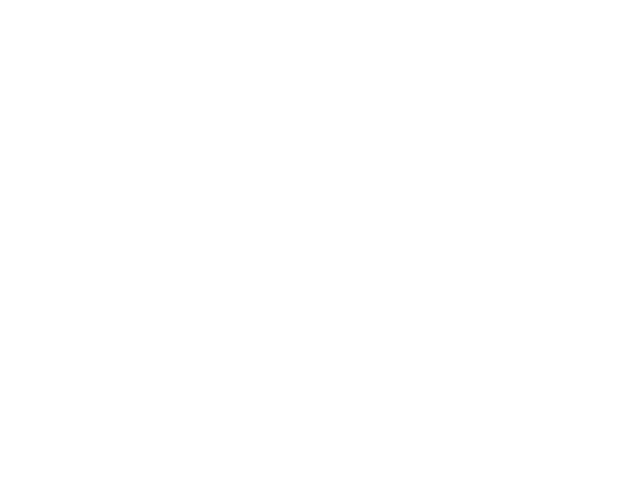

In [5]:
%matplotlib widget
plt.figure()
ax = sns.heatmap(DM_Ev[5], linewidth=0)
plt.show()

In [ ]:
print(DM_Ev[5][10,10])

# Distance matrix distributions

In [ ]:
# dist_values = np.unique(DM_Mc[0])
# print(dist_values)
# print(np.where(DM_Mc[0]==dist_values[-2]))

def matricesValues(M):
    dist_values = np.unique(M)
    distri_M = []
    for val in dist_values[:-1]:
        coords = np.where(M==val)
        distri_M.append(len(coords[0]))
    return dist_values[:-1],distri_M

def distribution(DM):
    distri = []
    for M in tqdm(DM):
        distri.append(matricesValues(M))    
    plt.figure(figsize=(8,2))
    plt.bar(distri[0][0],distri[0][1],width=0.007,alpha=0.4,label='tokens',color='g')
    plt.bar(distri[1][0],distri[1][1],width=0.006,alpha=0.3,label='lemmata',color='b')
    plt.bar(distri[2][0],distri[2][1],width=0.005,alpha=0.4,label='lemmata filtered',color='r')
    plt.legend()
    plt.ylim([0,max(distri[1][1][:-1])])
    plt.xlim([0.35,1])
    plt.show()

    plt.figure(figsize=(8,2))
    plt.bar(distri[4][0],distri[4][1],width=0.007,alpha=0.4,label='vocabulary',color='b')
    plt.bar(distri[6][0],distri[6][1],width=0.007,alpha=0.3,label='Parts-of-speech',color='g')
    plt.bar(distri[3][0],distri[3][1],width=0.007,alpha=0.7,label='bigrams',color='r')
    plt.legend()
    plt.ylim([0,max(distri[5][1][:-1])])
    plt.xlim([0.1,1])
    plt.show()

    return distri

distri = distribution(DM_Ev)

In [ ]:
# plt.figure(figsize=(8,2))
# plt.bar(distri_Mc[0][0],distri_Mc[0][1],width=0.005,alpha=0.4,label='tokens',color='g')
# plt.bar(distri_Mc[1][0],distri_Mc[1][1],width=0.004,alpha=0.3,label='lemmata',color='b')
# plt.bar(distri_Mc[2][0],distri_Mc[2][1],width=0.003,alpha=0.4,label='lemmata filtered',color='r')
# plt.legend()
# plt.legend()
# plt.ylim([0,max(distri_Mc[1][1][:-1])])
# plt.xlim([0.65,1])
# plt.show()

In [ ]:
# plt.figure(figsize=(8,2))
# plt.bar(distri_Mc[4][0],distri_Mc[4][1],width=0.005,alpha=0.4,label='vocabulary',color='b')
# plt.bar(distri_Mc[5][0],distri_Mc[5][1],width=0.005,alpha=0.3,label='Parts-of-speech',color='g')
# plt.bar(distri_Mc[3][0],distri_Mc[3][1],width=0.005,alpha=0.7,label='bigrams',color='r')
# plt.legend()
# plt.ylim([0,max(distri_Mc[5][1][:-1])])
# plt.xlim([0.35,1])
# plt.show()

# Other distributions

In [ ]:
def distribution(M,step):
    M = M+M.transpose()-1
    cases = np.linspace(0,1,step)
    distrib = [0 for i in range(len(cases)-1)]
    for i in range(len(cases)-1):
        values_x,values_y = np.where((M<cases[i+1]) & (M>cases[i]))
        distrib[i] = len(values_x)
    return cases,distrib

cases,dist = distribution(DM_Mc[0],200)
plt.figure()
plt.plot(cases[1:],dist)
plt.show()
print(DM_Mc[0].mean(omitnan=True))

In [ ]:
# Compute distributions for each distance matrices
%matplotlib widget
plt.figure()
# distrib = np.histogram(DM_Lc[5])


plt.hist(DM_Mc[0])
plt.show()

# Verses dendrogram computation

In [9]:
# Half matrix value correction
def triangularMatrix(M):
    length = M[0].shape
    for g in tqdm(range(5)):
        for i in range(length[0]):
            for j in range(0,i+1):
                M[g][i][j] = 1
    return M

DM_Mc = triangularMatrix(DM_Mc)
DM_Mt = triangularMatrix(DM_Mt)
DM_Lc = triangularMatrix(DM_Lc)
DM_Jn = triangularMatrix(DM_Jn)
DM_Ev = triangularMatrix(DM_Ev)

100%|█████████████████████████████████████████████| 5/5 [00:09<00:00,  1.85s/it]


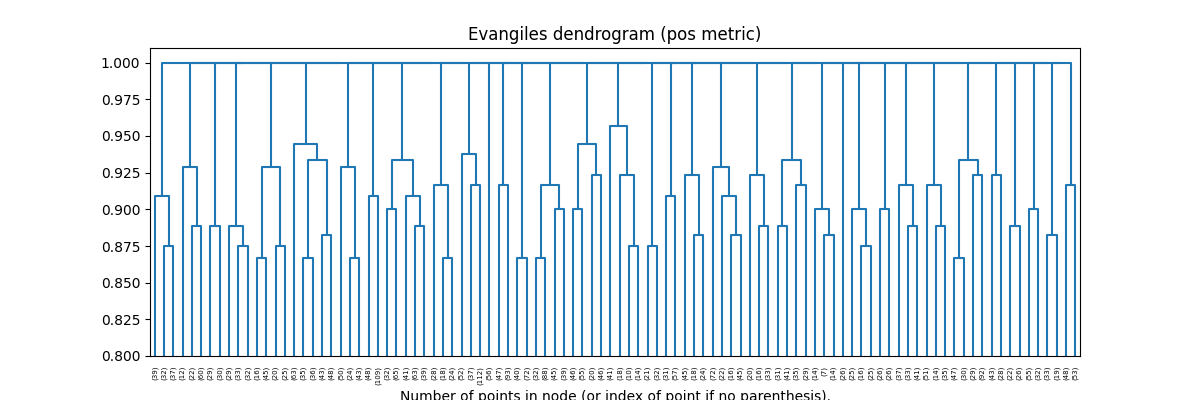

In [16]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model_dendro = AgglomerativeClustering(distance_threshold=0, n_clusters=None,metric='precomputed',linkage='complete') # Complete gives significantly better results (relatively homogenous clusters in sizes)
model_dendro = model_dendro.fit(DM_Ev[4]) 

plt.close()
plt.figure(figsize=(12, 4))
plt.title("Evangiles dendrogram (pos metric)")
# plot the top three levels of the dendrogram
plot_dendrogram(model_dendro, truncate_mode="lastp", p=100)
# plot_dendrogram(model_dendro, truncate_mode="level", p=2)
plt.ylim([0.8, 1.01])
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Hierarchical clustering

The dendrogram shows fully inconsistent clusters (distances equal to 1). We gather observations according to this pattern.

Number of clusters : 35


NameError: name 'n_clusters' is not defined

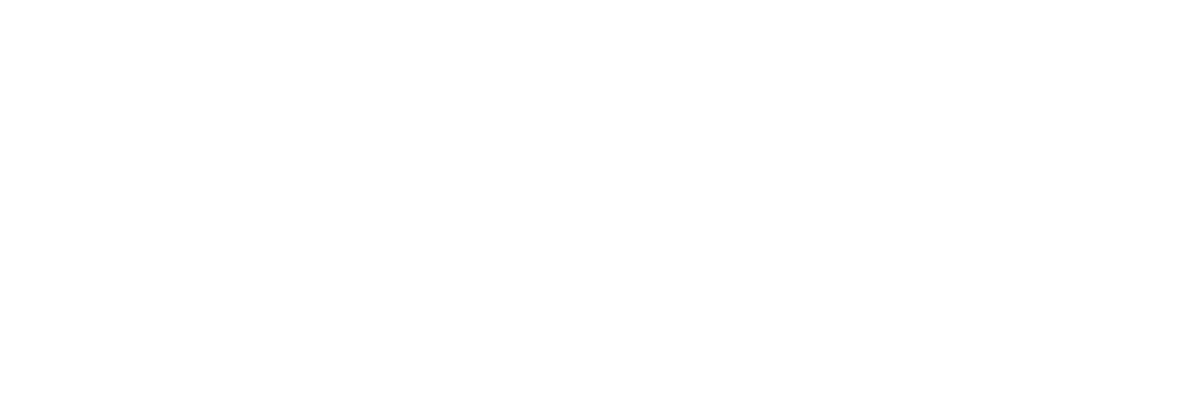

In [13]:
distance_thr = 0.98

model_clustering = AgglomerativeClustering(distance_threshold=distance_thr, n_clusters=None,metric='precomputed',linkage='complete') # Complete gives significantly better results (relatively homogenous clusters in sizes)

Evangiles['pos_clusters'] = model_clustering.fit_predict(DM_Ev[4])
Ev_clusters = len(np.unique(Evangiles['pos_clusters']))
print("Number of clusters :",str(Ev_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*10,color_threshold=distance_thr)
plt.title("Evangiles's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

Matt['pos_clusters'] = model_clustering.fit_predict(DM_Mt[4])
Mt_clusters = len(np.unique(Matt['pos_clusters']))
print("Number of clusters :",str(Mt_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*5,color_threshold=distance_thr)
plt.title("Matthieu's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

Mark['pos_clusters'] = model_clustering.fit_predict(DM_Mc[4])
Mc_clusters = len(np.unique(Mark['pos_clusters']))
print("Number of clusters :",str(Mc_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*5,color_threshold=distance_thr)
plt.title("Mark's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

Luke['pos_clusters'] = model_clustering.fit_predict(DM_Lc[4])
Lc_clusters = len(np.unique(Luke['pos_clusters']))
print("Number of clusters :",str(Lc_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*5,color_threshold=distance_thr)
plt.title("Luke's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

John['pos_clusters'] = model_clustering.fit_predict(DM_Jn[4])
Jn_clusters = len(np.unique(John['pos_clusters']))
print("Number of clusters :",str(Jn_clusters))
plt.figure(figsize=(12, 4))
out = plot_dendrogram(model_clustering, truncate_mode='lastp', p=n_clusters*5,color_threshold=distance_thr)
plt.title("John's verses hierarchical clustering (parts-of-speech)")
plt.xlabel("Number of verses in node")
plt.ylabel("Edit distance (pos)")
plt.ylim([0.8, 1.01])
plt.show()

# Clusters content investigation

## Verses lengths and positions

/tmp/ipykernel_34474/3707703199.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 4))


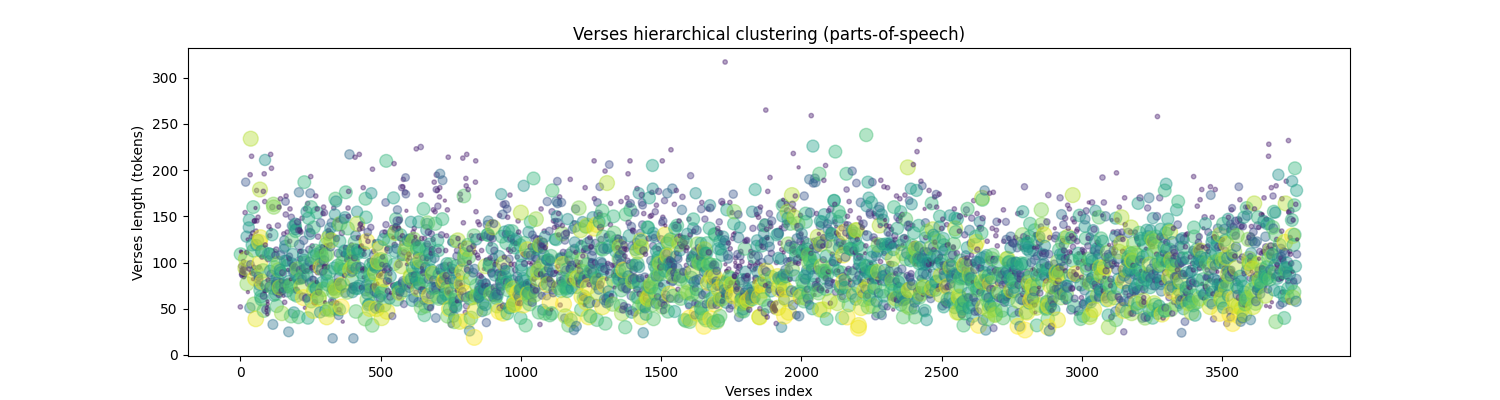

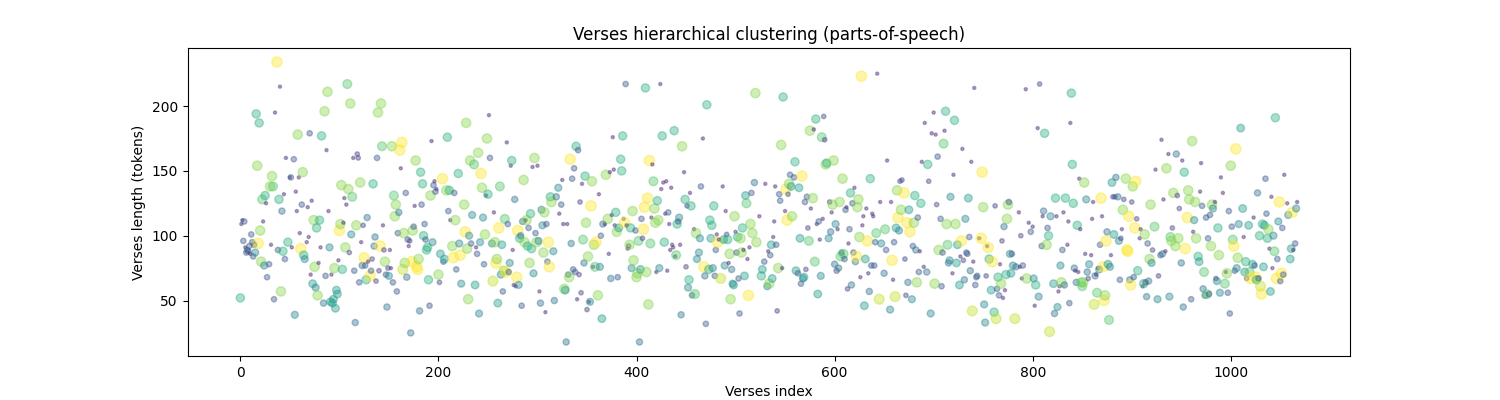

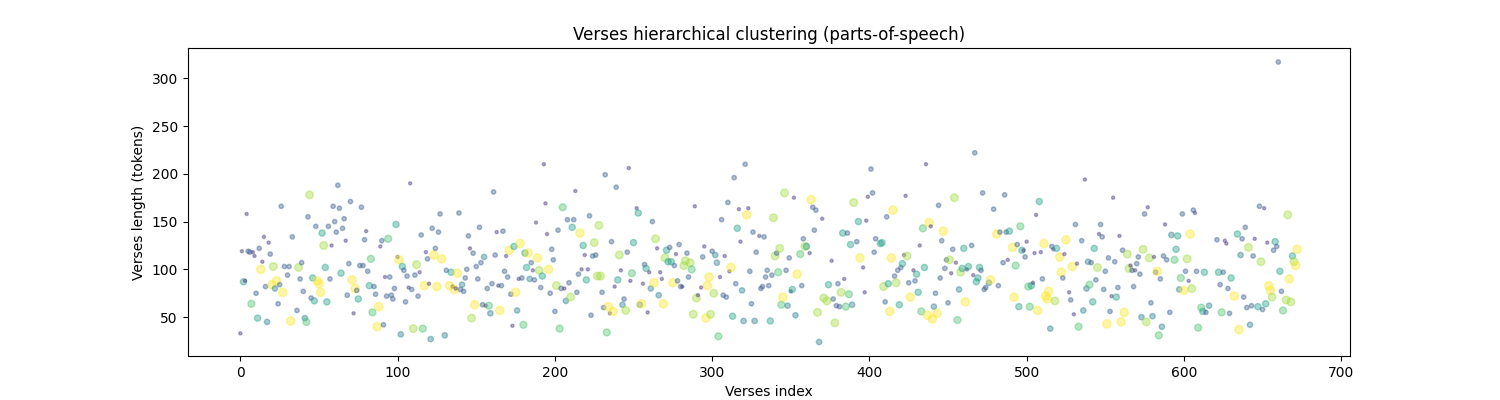

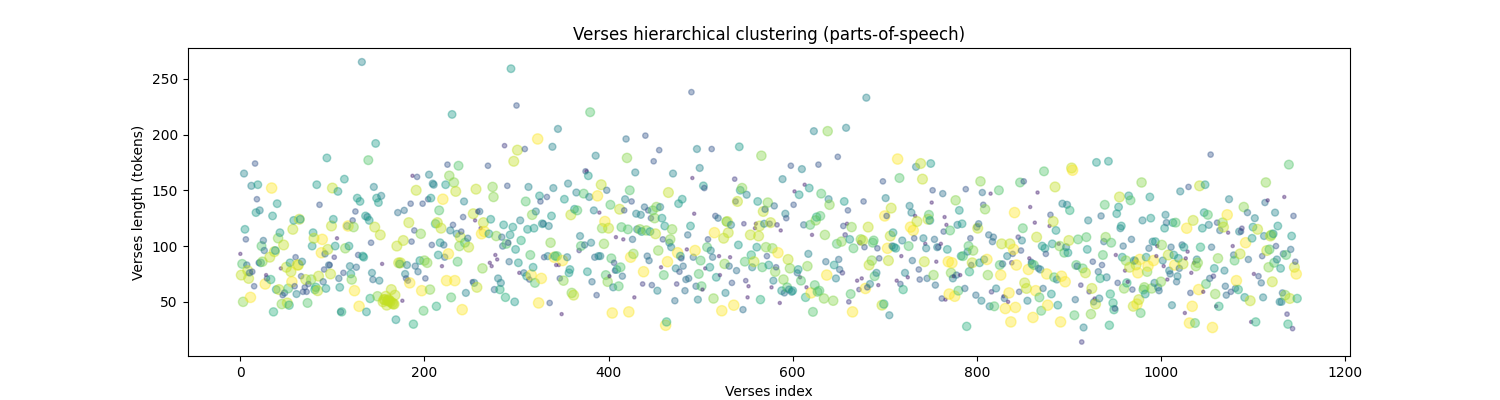

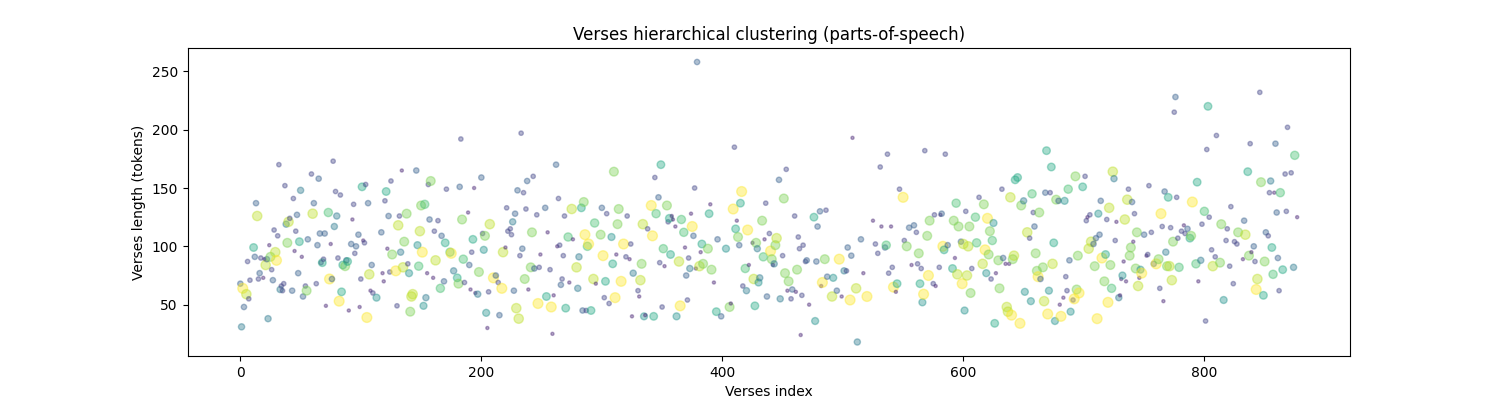

In [28]:
def lengths_positions(df):    
    colors = df.pos_clusters
    
    plt.figure(figsize=(15, 4))
    out = plt.scatter(df.index,verses_length,df.pos_clusters*5, c=colors, alpha=0.4)
    plt.title("Verses hierarchical clustering (parts-of-speech)")
    plt.xlabel("Verses index")
    plt.ylabel("Verses length (tokens)")
    # plt.legend()
    # plt.ylim([20, 400])
    plt.show()

lengths_positions(Evangiles)
lengths_positions(Matt)
lengths_positions(Mark)
lengths_positions(Luke)
lengths_positions(John)


## Clusters representatives
Define as the minimum-length or the median-length observation of the cluster

In [71]:
def representatives(df,feature='pos'):
    n_clusters = len(np.unique(df.pos_clusters))
    for i in range(n_clusters):
        print("\n ------ Representative of cluster :",str(i))
        idx = np.where(df.pos_clusters==i)
        # print(idx[0])
        df_ex = df.iloc[idx[0]].reset_index(drop=True)
        median = np.argsort(df_ex.length)[len(df_ex.length)//2]
        mini = np.argmin(df_ex.length)
        # print(mini)
        print("Number of observations :",len(idx[0]))
        print(df_ex[feature][median])
        
representatives(Mark,'pos')


 ------ Representative of cluster : 0
Number of observations : 41
['pronoun', 'adverb', 'adverb', 'verb', 'verb', 'adposition', 'pronoun', 'coordinating_conjunction', 'pronoun', 'verb', 'verb']

 ------ Representative of cluster : 1
Number of observations : 114
['coordinating_conjunction', 'verb', 'determiner', 'noun', 'pronoun', 'adposition', 'noun', 'coordinating_conjunction', 'verb', 'pronoun', 'adjective', 'verb', 'coordinating_conjunction', 'determiner', 'noun', 'verb', 'pronoun', 'determiner', 'noun', 'pronoun']

 ------ Representative of cluster : 2
Number of observations : 234
['coordinating_conjunction', 'verb', 'adposition', 'determiner', 'noun', 'pronoun', 'verb', 'determiner', 'noun', 'verb', 'adposition', 'determiner', 'noun', 'coordinating_conjunction', 'determiner', 'noun', 'verb']

 ------ Representative of cluster : 3
Number of observations : 40
['adverb', 'adverb', 'verb', 'pronoun', 'verb', 'noun', 'noun', 'noun']

 ------ Representative of cluster : 4
Number of obs

# Clusters statistics